<a href="https://colab.research.google.com/github/utkarsha30/Project-rcv1/blob/main/notebook1_1000samples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RCV1 Dataset

---

**Problem Statement** : *Developing a Multi-Label Classification Model Using the RCV1 Dataset for Accurate News Articles Classification*

In [ ]:
# Import required for project
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, hamming_loss,precision_score, recall_score
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_rcv1
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import warnings
import pandas as pd
import sklearn.metrics


In [ ]:
# fetching the data for rcv1_data set
rcv1 = fetch_rcv1()

In [ ]:
rcv1.data.shape
rcv1.target.shape
rcv1.target_names
print("Shape of rcv1.data:", rcv1.data.shape)
print("Shape of rcv1.target:", rcv1.target.shape)
print("rcv1.target_names:", rcv1.target_names)


Shape of rcv1.data: (804414, 47236)
Shape of rcv1.target: (804414, 103)
rcv1.target_names: ['C11' 'C12' 'C13' 'C14' 'C15' 'C151' 'C1511' 'C152' 'C16' 'C17' 'C171'
 'C172' 'C173' 'C174' 'C18' 'C181' 'C182' 'C183' 'C21' 'C22' 'C23' 'C24'
 'C31' 'C311' 'C312' 'C313' 'C32' 'C33' 'C331' 'C34' 'C41' 'C411' 'C42'
 'CCAT' 'E11' 'E12' 'E121' 'E13' 'E131' 'E132' 'E14' 'E141' 'E142' 'E143'
 'E21' 'E211' 'E212' 'E31' 'E311' 'E312' 'E313' 'E41' 'E411' 'E51' 'E511'
 'E512' 'E513' 'E61' 'E71' 'ECAT' 'G15' 'G151' 'G152' 'G153' 'G154' 'G155'
 'G156' 'G157' 'G158' 'G159' 'GCAT' 'GCRIM' 'GDEF' 'GDIP' 'GDIS' 'GENT'
 'GENV' 'GFAS' 'GHEA' 'GJOB' 'GMIL' 'GOBIT' 'GODD' 'GPOL' 'GPRO' 'GREL'
 'GSCI' 'GSPO' 'GTOUR' 'GVIO' 'GVOTE' 'GWEA' 'GWELF' 'M11' 'M12' 'M13'
 'M131' 'M132' 'M14' 'M141' 'M142' 'M143' 'MCAT']


**Note :** I have started the project with a small subsample of the rcv1 dataset, as Google Colab kept crashing with 1000 samples. As Im not taking entire dataset I have decided to go with default split of 70% for training and 30% for testing.

In [ ]:
# Spliting the data into training and testing sets.

# Extracting features (X) and target labels (y) from the dataset
X = rcv1.data
y = rcv1.target
# Specifying the number of samples for training and testing
num_train_samples = 700
num_test_samples = 300

# Performing the train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=num_train_samples, test_size=num_test_samples, shuffle=False
)


**Conduct Exploratory Data Analysis**

---
Began with converting the dataset from sparse matrix to dense array


In [ ]:
# Converting y_train and X_train to dense arrays
y_train = y_train.toarray()
X_train = X_train.toarray()
# Converting y_test and X_test to dense arrays
X_test = X_test.toarray()
y_test = y_test.toarray()

In [ ]:
# Defining feature names for both training and testing sets
feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]
feature_df_train = pd.DataFrame(X_train, columns=feature_names)

feature_names = [f"feature_{i}" for i in range(X_test.shape[1])]
feature_df_test = pd.DataFrame(X_test, columns=feature_names)

# Creating DataFrames for training targets and testing targets
target_names = rcv1.target_names
target_df_train = pd.DataFrame(y_train, columns=target_names)
target_df_test = pd.DataFrame(y_test, columns=target_names)

Identified columns that have all zero values for feature and dropped them, similarly identified columns which have all zeros for target and dropped them as well

In [ ]:
# Identifying columns with all zero values in the training features
zero_columns = feature_df_train.columns[feature_df_train.eq(0).all()]

# Dropping columns with all zero values from training and testing feature DataFrames
feature_df_train.drop(columns=zero_columns, inplace=True)
feature_df_test.drop(columns=zero_columns, inplace=True)


In [ ]:
# Identifying columns with all zero values in the training targets
zero_columns = target_df_train.columns[target_df_train.eq(0).all()]

# Dropping columns with all zero values from training and testing target DataFrames
target_df_train.drop(columns=zero_columns, inplace=True)
target_df_test.drop(columns=zero_columns, inplace=True)

**Feature Engineering and Visualization**

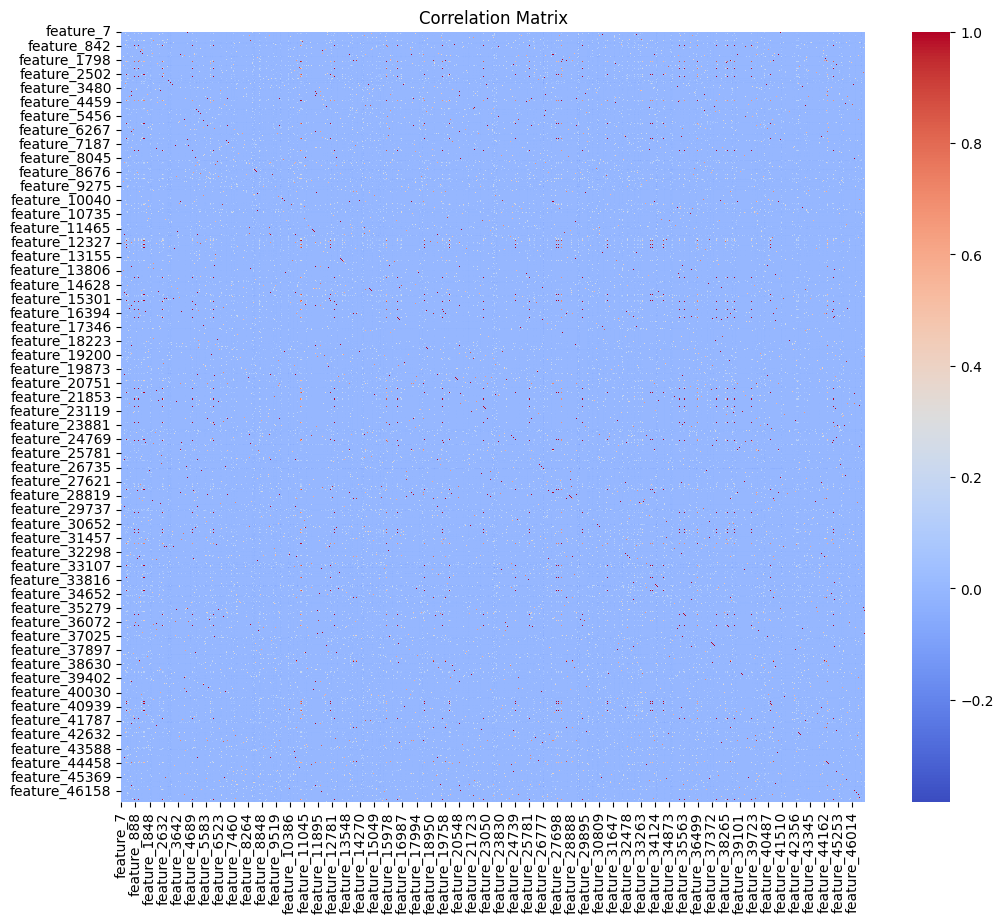

In [ ]:
# Visualization 1: Correlation Matrix
corr_matrix = feature_df_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Correlation Matrix")
plt.show()

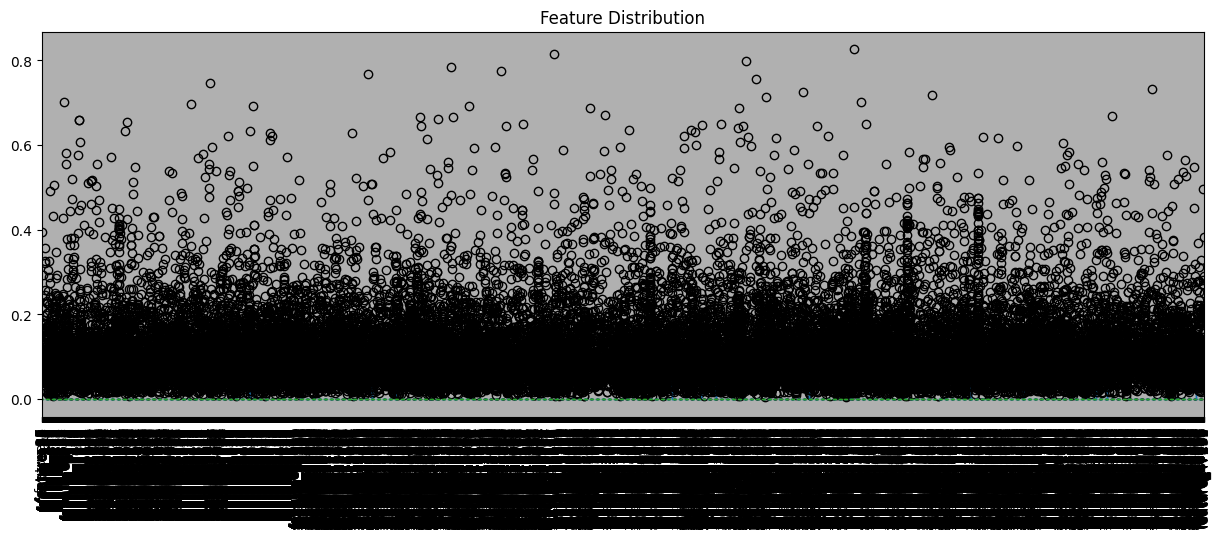

In [ ]:
# Feature distribution
plt.figure(figsize=(15, 5))
feature_df_train.boxplot(rot=90)
plt.title("Feature Distribution")
plt.show()

Class Distribution diagram shows imbalanced data distribution, hence Min-Max Scaling is performed

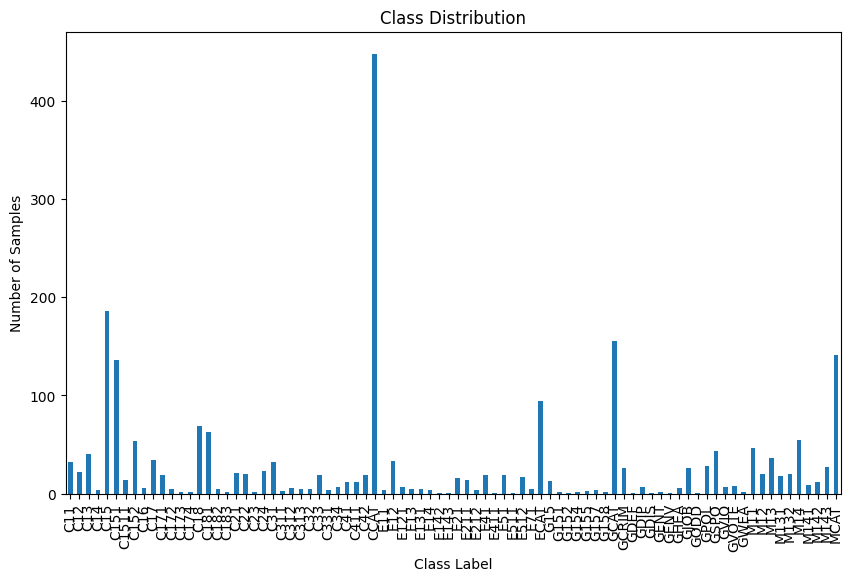

In [ ]:
# Class distribution
plt.figure(figsize=(10, 6))
target_df_train.sum().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.show()

In [ ]:
# Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(feature_df_train)
X_test_scaled = scaler.transform(feature_df_test)

**Model Building and Regularization**


**Note** :  As the problem statement involves multilabel classification, I have incorporated additional performance metrics, including precision, recall, and accuracy. An additional component, hamming loss, has been utilized for comprehensive evaluation.

Hamming loss: Measures the fraction of labels that are incorrectly predicted. It is the ratio of the incorrect predictions to the total number of labels.
Hamming Loss = Number of Incorrect Predictions/Total Number of Labels


In [ ]:
# 1.SVM
# Creating a linear SVM model
svm_model = MultiOutputClassifier(SVC(kernel='linear'))

# Training the model on the training set
svm_model.fit(X_train_scaled, target_df_train)

# Making predictions on the testing set
y_pred = svm_model.predict(X_test_scaled)

# Evaluating the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Linear SVM:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Metrics Performance for Linear SVM:
Accuracy: 12.00%
Hamming Loss: 2.83%
Weighted Precision: 77.46%
Weighted Recall: 34.33%


In [ ]:
# 2.Random Forest Classifier

# Creating a RandomForestClassifier instance
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier on the training data
rf_classifier.fit(X_train_scaled, target_df_train)

# Making predictions on the test set
y_pred = rf_classifier.predict(X_test_scaled)

# Evaluating the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Random Forest:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Metrics Performance for Random Forest:
Accuracy: 2.33%
Hamming Loss: 3.34%
Weighted Precision: 68.52%
Weighted Recall: 19.66%


In [ ]:
# 3.logistic regression
# Creating a LogisticRegression model
logistic_regression_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Wrapping the classifier with MultiOutputClassifier for multi-label classification
logistic_regression_model = MultiOutputClassifier(logistic_regression_classifier)

# Training the model on the training set
logistic_regression_model.fit(X_train, target_df_train)

# Making predictions on the testing set
y_pred = logistic_regression_model.predict(X_test)

# Evaluating the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Logistic Regression:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")



Metrics Performance for Logistic Regression:
Accuracy: 0.00%
Hamming Loss: 3.89%
Weighted Precision: 41.84%
Weighted Recall: 10.63%


In [ ]:
# 4.Naive Bayse
# Creating a Naive Bayes model
nb_classifier = MultinomialNB()

# Wrapping the classifier with MultiOutputClassifier for multi-label classification
nb_model = MultiOutputClassifier(nb_classifier)

# Splitting the data into training and testing sets

# Training the model on the training set
nb_model.fit(X_train_scaled, target_df_train)

# Making predictions on the testing set
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')

# Print the evaluation metrics
print("Metrics Performance for Naive Bayes :")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Metrics Performance for Naive Bayes :
Accuracy: 0.00%
Hamming Loss: 3.27%
Weighted Precision: 60.50%
Weighted Recall: 35.81%


**Dimensionality Reduction, Performance Measurement, and Model Evaluation**

In [ ]:
# Performing PCA
pca = PCA(n_components=0.95)  # Keeping 95% of variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

Retaraining all the models with PCA and gradient discent for optimal performance

In [ ]:
# 1. linear SVM with PCA and gradient descent
# Initialize the SGDClassifier
sgd_classifier = SGDClassifier(loss='hinge',  # For linear SVM
                               alpha=0.0001,  # Regularization strength
                               max_iter=1000,  # Number of iterations
                               tol=1e-3,  # Tolerance to declare convergence
                               random_state=42)

# Wrapping the classifier with MultiOutputClassifier for multi-label classification
svm_model = MultiOutputClassifier(sgd_classifier)


# Training the model on the training set
svm_model.fit(X_train_pca, target_df_train)

# Making predictions on the testing set
y_pred = svm_model.predict(X_test_pca)

# Evaluate the model
# Evaluate the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for SVM with PCA and gradient descent  :")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Metrics Performance for SVM with PCA and gradient descent  :
Accuracy: 12.67%
Hamming Loss: 2.75%
Weighted Precision: 81.42%
Weighted Recall: 34.01%


**Observation:** To perform gradient descent, continuous parameters are required, and the loss function must be differentiable with respect to these parameters. Random forests, however, have discrete hyperparameters (such as tree depth, number of trees, number of features, etc.). Consequently, gradient descent is not applicable in this context.

In [ ]:
# 2.Random forest with PCA
# Create=ing a RandomForestClassifier instance
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the classifier on the training data with PCA-transformed features
rf_classifier_pca.fit(X_train_pca, target_df_train)

# Make predictions on the test set with PCA-transformed features
y_pred = rf_classifier_pca.predict(X_test_pca)

# Evaluate the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Random forest with PCA :")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")

Metrics Performance for Random forest with PCA :
Accuracy: 1.00%
Hamming Loss: 3.55%
Weighted Precision: 59.20%
Weighted Recall: 15.73%


In [ ]:
# 3.Logistic Regression with PCA and gradient descent
# Creating an SGDClassifier for Logistic Regression
sgd_classifier = SGDClassifier(loss='log', alpha=0.01, max_iter=1000, random_state=42)

# Wrapping the classifier with MultiOutputClassifier for multi-label classification
logistic_regression_model = MultiOutputClassifier(sgd_classifier)

# Training the model on the training set
logistic_regression_model.fit(X_train_pca, target_df_train)

# Making predictions on the testing set
y_pred = logistic_regression_model.predict(X_test_pca)

# Evaluate the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Logistic Regression with PCA and gradient descent :")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Metrics Performance for Logistic Regression with PCA and gradient descent :
Accuracy: 3.33%
Hamming Loss: 3.14%
Weighted Precision: 75.96%
Weighted Recall: 23.17%


**Observation** :Multinomial Naive Bayes is a probabilistic classification algorithm, and it typically doesn't use gradient descent for optimization. Instead, it estimates probabilities directly from the training data. The parameters in Multinomial Naive Bayes are probabilities associated with each term (feature) in each class.

In [ ]:
# 4.Naive Bayse with hyper parameter tunning
# To ignore all warnings
warnings.filterwarnings("ignore")

# Creating a Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()

# Defining the parameter grid for the grid search
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Creating a GridSearchCV object
grid_search = GridSearchCV(nb_classifier, param_grid, scoring='accuracy')

# Creating a MultiOutputClassifier with the grid search
nb_model = MultiOutputClassifier(grid_search)

# Fitting the model on the training data
nb_model.fit(X_train_scaled, target_df_train)

# Accessing the best hyperparameters from the GridSearchCV object
best_params = nb_model.estimators_[0].best_params_
print("Best Hyperparameters:", best_params)

# Predicting on the test set using the best model
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the performance
hamming_loss_value = hamming_loss(target_df_test, y_pred)
precision = precision_score(target_df_test, y_pred, average='micro')
recall = recall_score(target_df_test, y_pred, average='micro')
accuracy = accuracy_score(target_df_test, y_pred)

# Print the evaluation metrics
print("Metrics Performance for Naive Bayse with hyper parameter tunning :")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Hamming Loss: {hamming_loss_value * 100:.2f}%")
print(f"Weighted Precision: {precision * 100:.2f}%")
print(f"Weighted Recall: {recall * 100:.2f}%")


Best Hyperparameters: {'alpha': 2.0}
Metrics Performance for Naive Bayse with hyper parameter tunning :
Accuracy: 7.00%
Hamming Loss: 3.01%
Weighted Precision: 75.71%
Weighted Recall: 28.48%


**Performance Analysis**
1.Linear SVM: The performance of Linear SVM improved after PCA and gradient descent, achieving an accuracy of 12.67% and a hamming loss of 2.75%.

2.Random Forest: In Random Forest, accuracy decreased, and hamming loss increased; PCA resulted in reduced model performance, with an accuracy of 1% and a hamming loss of 3.55%.

3.Logistic Regression: Logistic Regression showed improved performance after PCA and gradient descent, with an accuracy of 3.33% and a hamming loss of 3.14%.

4.Naive Bayes: Naive Bayes demonstrated improved performance, achieving an accuracy of 7% and a hamming loss of 3.01%.

In comparison to all the above models, Linear SVM after PCA and gradient descent delivered the best performance with an accuracy of 12.67% and a minimum loss of 2.75%.

---


**Conclusion :**
*   PCA have created very negligable impact on performance
*   The model's performance may vary based on the size of the sample set of the rcv1 dataset. Currently, the model is exposed to only a partial part of all the possible variations.
*   According to the analysis, Linear SVM is the best model for performing multilabel classification as of now.



